# TensorFlow
2015년 구글의 인공지능 파트인 구글브레인에서 개발하고 오픈소스 라이선스(Apache 2.0)로 공개

Data Flow Graph를 기반으로 하는 numerial computation을 하는 오픈소스 소프트웨어 라이브러리

수치 계산과 데이터의 흐름을 노드와 엣지를 사용한 양방향 그래프로 표현 (노드 : 수치연산 / 엣지 : 노드 사이를 이동하는 다차원 데이터 텐서)

In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__)

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]


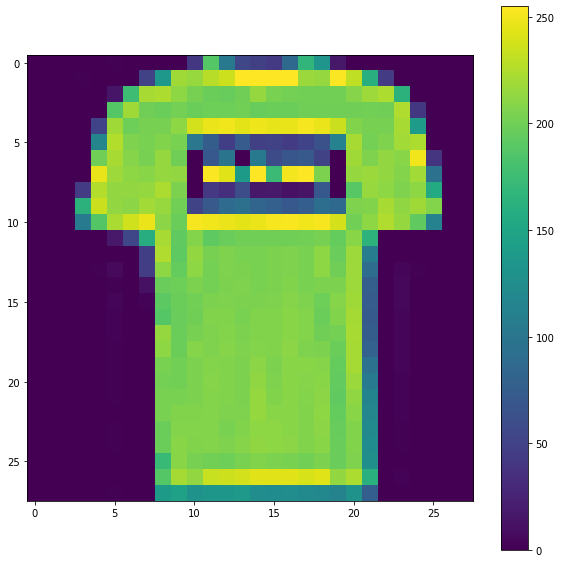

In [24]:
# 데이터 전처리 1
plt.figure(figsize=(10, 10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

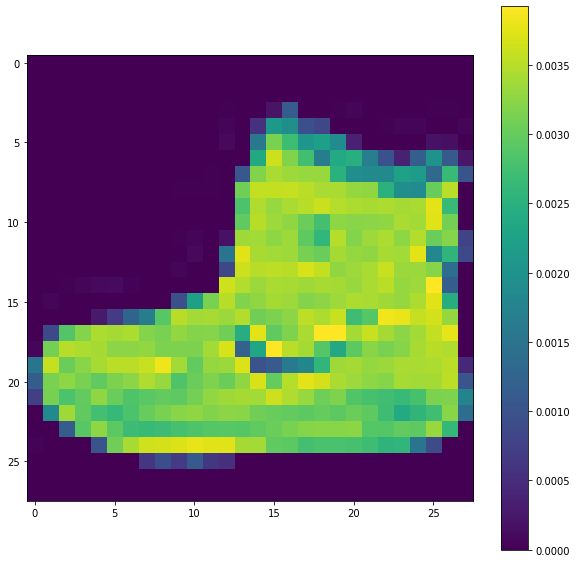

In [21]:
# 데이터 전처리 2

# 값 범위 조정 [0-255]에서 [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

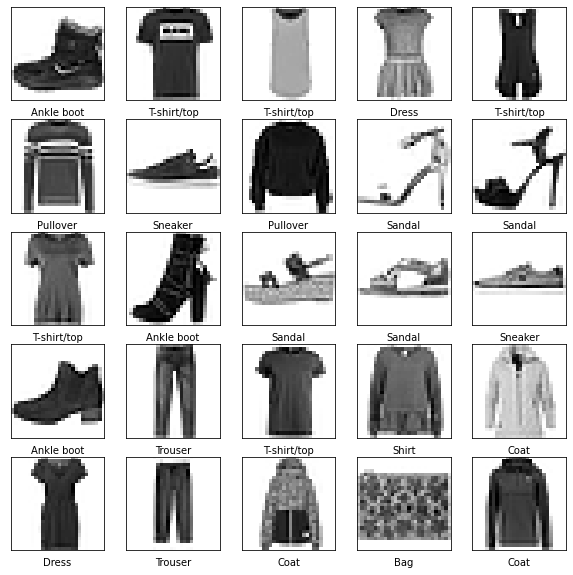

In [25]:
# 데이터 전처리 3
plt.figure(figsize=(10,10))

# 훈련 데이터 처음 25개 이미지, 클래스 이름 출력해보기
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
# 모델 구성 - 층을 구성한 다음 모델을 컴파일 해야함


# 1. 층 설정
model = keras.Sequential([
    # 2차원 배열(28*28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
    keras.layers.Flatten(input_shape=(28,28)),
    # 128개의 노드(뉴런)
    keras.layers.Dense(128, activation=tf.nn.relu),
    # 10개의 노드의 소프트맥스층(10개의 확률을 반환하고 반환된 값은 전체 합의 1이 됨)
    # 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 2. 모델 컴파일
# 손실 함수 - 훈련하는 동안 모델의 오차(모델이 얼마나 정확한지 측정)를 측정. 모델의 학습이 올바픈 방향으로 향하도록 이 함수 값을 최소화 해야함.
# 옵티마이저 - 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정
# 메트릭(지표) - 훈련 단계와 테스트 단계를 모니터링하기 위해 사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. 모델 훈련
# 훈련 데이터를 모델에 주입
# 모델이 이미지와 레이블을 매핑하는 방법 배움.
# 테스트 세트에 대한 모델의 예측을 만듦. (test_images 배열을 통한 예측이 test_labels 배열의 레이블과 맞는지 확인)
# 예측이 test_labels 배열의 레이블과 일치하는지 확인.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2022-07-26 21:24:03.930657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 3s 1ms/step - loss: 4.1503 - accuracy: 0.6934
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7035 - accuracy: 0.7365
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6246 - accuracy: 0.7616
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5970 - accuracy: 0.7749
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5667 - accuracy: 0.7898


In [28]:
# 정확도  평가

# evaluate 함수에 테스트 이미지와 테스트 라벨을 인자로 줘 모델의 성능 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss, test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7805
0.6016606092453003 0.7804999947547913


313/313 [==============================] - 0s 1ms/step
[2.3204647e-24 1.1506424e-25 0.0000000e+00 1.4322052e-25 2.6274371e-23
 1.7957555e-01 1.5929039e-23 2.8507629e-01 2.4241403e-15 5.3534818e-01]
9


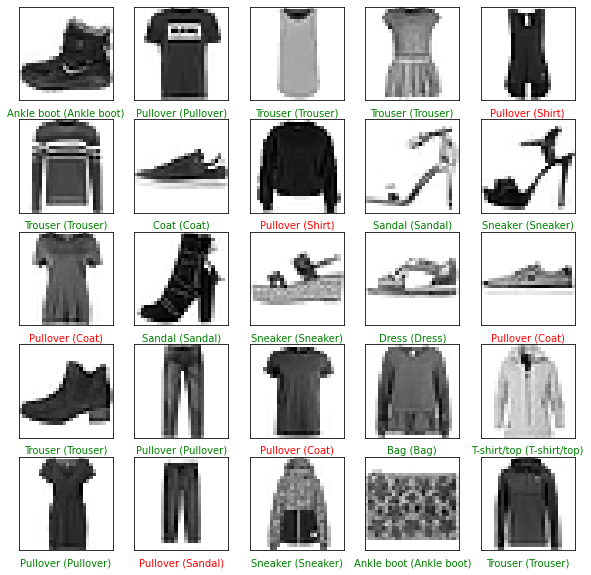

In [30]:
# 예측 만들기

# 훈련된 모델을 사용해 실제 모델이 어떻게 예측하는지 test_images로 확인
predictions = model.predict(test_images)
print(predictions[0])

np.argmax(predictions[0])
print(test_labels[0])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로
    if predicted_label == true_label:
        color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
plt.show()

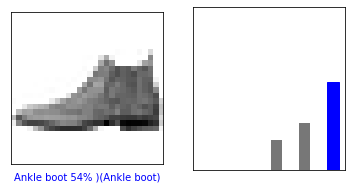

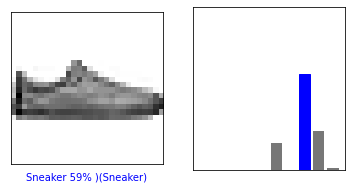

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% )({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

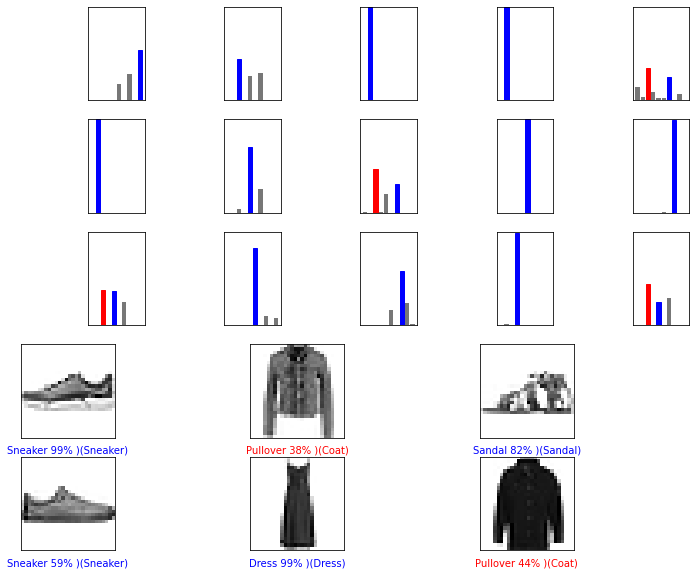

In [34]:
# 처음 X 개의 테스트 에미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_rows, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [35]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[0]
print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img, 0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 29ms/step
[[2.3204468e-24 1.1506292e-25 0.0000000e+00 1.4321887e-25 2.6274166e-23
  1.7957546e-01 1.5928914e-23 2.8507644e-01 2.4241310e-15 5.3534812e-01]]


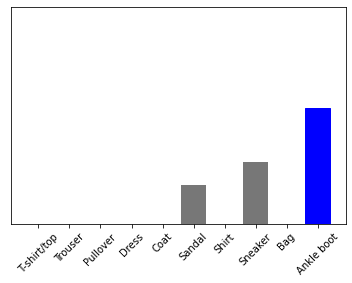

9


In [37]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)